# Whirwind Tour
Just to get you excited a quick tour through what you will learn in this course. Hit <kbd>Shift</kbd> + <kbd>Enter</kbd> to execute the code and proceed to the next cell. 

## Basic Python
Using Python as a general purpose programming language.

In [1]:
i = 0
while i < 10:
    print(i, end=' ')
    i += 1

0 1 2 3 4 5 6 7 8 9 

## Advanced Python
Effectively use Python specific features.

In [2]:
class Incrementer:
    def __init__(self, start, end):
        self.i = start
        self.end = end
        
    def __next__(self):
        i = self.i
        self.i += 1
        if i >= self.end:
            raise StopIteration
        return i
    
    def __iter__(self):
        return self

    
for i in Incrementer(0, 10):
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 

## Numerical Computing with NumPy
Efficient numerical computing on larger datasets. 

In [3]:
import numpy
np.random.seed(1)
two_dim_arr = np.random.randint(0, high=20, size=(16, 16))
two_dim_arr

NameError: name 'np' is not defined

## Visualizations with Matplotlib
Powerful visualizations.

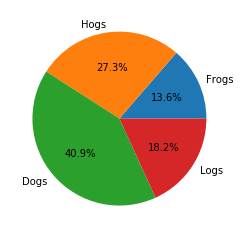

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Framing your Data with Pandas
The almighty tool for working with tabular data.

In [5]:
import pandas as pd

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
states = pd.DataFrame({'population': population_dict,
                       'area': area_dict,
                       'country': 'USA'})
states

,population,area,country
California,38332521,423967,USA
Florida,19552860,170312,USA
Illinois,12882135,149995,USA
New York,19651127,141297,USA
Texas,26448193,695662,USA


## Statistical Modeling with statsmodels
Making statistics easy.

In [6]:
import statsmodels.formula.api as smf

n_samples = 100
intercept = 5
slope = 2

x = np.linspace(0, 10, n_samples)
noise = np.random.normal(size=n_samples)
y = intercept + x * slope + noise
data = pd.DataFrame({'x': x, 'y': y})
fit = smf.ols('y ~ x', data).fit()
fit.summary()

NameError: name 'np' is not defined

## Statistical visualization
Quickly visualize statistical relationships.

/home/jarno/.miniconda/envs/scientific/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jarno/.miniconda/envs/scientific/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


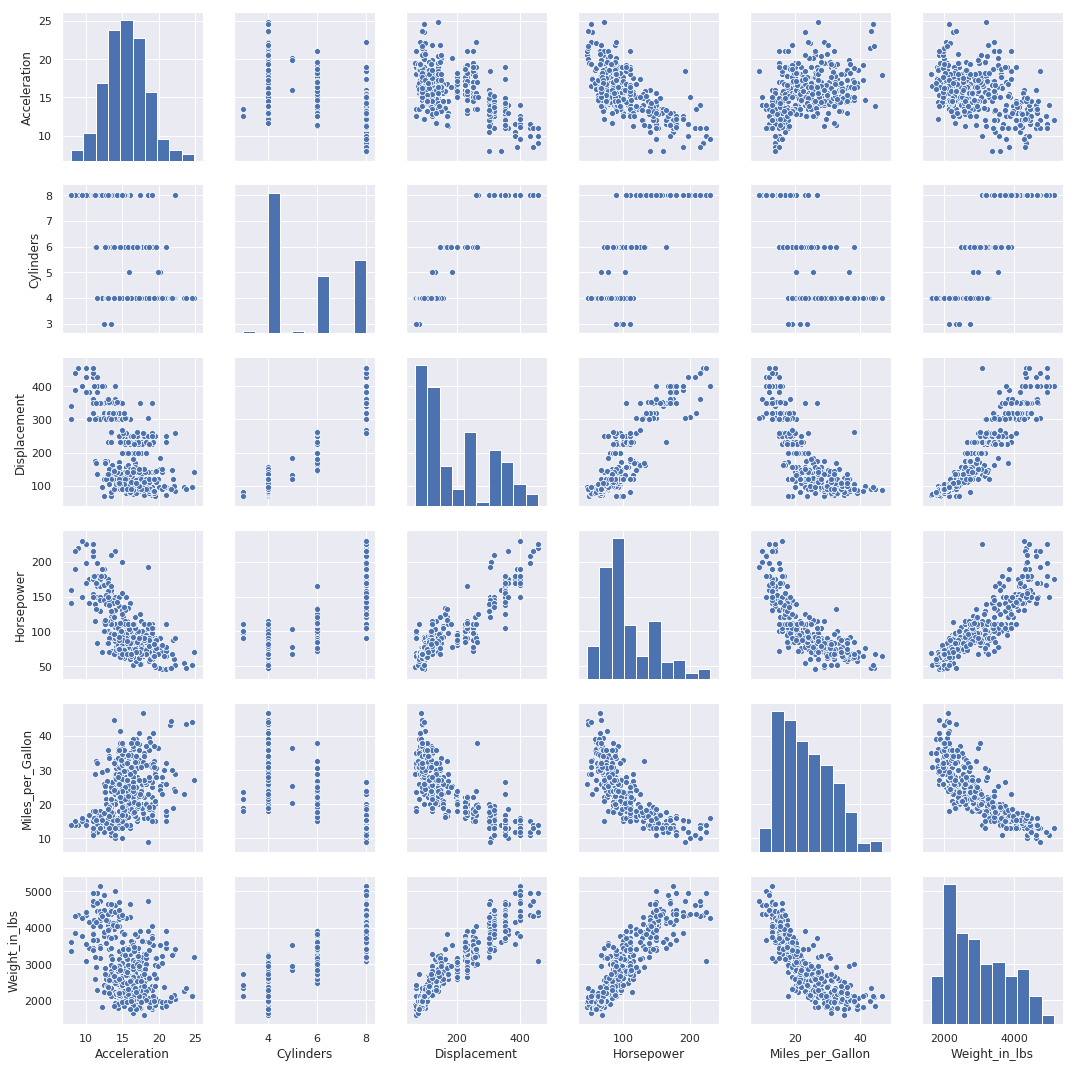

In [7]:
import vega_datasets
import seaborn as sns
sns.set()
cars = vega_datasets.data.cars()
sns.pairplot(cars)

## Interactive Data Analysis
Explore your data interactively.

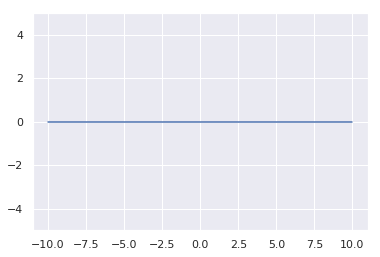

In [8]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(slope, intercept):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope * x + intercept)
    ax.set_ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, slope=(-2.0, 2.0), intercept=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [9]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=source)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


## Performance optimization
Make your Python code blazingly fast.

In [10]:
from numba import jit
import numpy as np

x = np.arange(100).reshape(10, 10)

def go_slow(a):
    trace = 0
    for i in range(a.shape[0]):   
        trace += np.tanh(a[i, i]) 
    return a + trace 

@jit(nopython=True) 
def go_fast(a):
    trace = 0
    for i in range(a.shape[0]):   
        trace += np.tanh(a[i, i]) 
    return a + trace    

print(go_fast(x))

[[  9.  10.  11.  12.  13.  14.  15.  16.  17.  18.]
 [ 19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]
 [ 29.  30.  31.  32.  33.  34.  35.  36.  37.  38.]
 [ 39.  40.  41.  42.  43.  44.  45.  46.  47.  48.]
 [ 49.  50.  51.  52.  53.  54.  55.  56.  57.  58.]
 [ 59.  60.  61.  62.  63.  64.  65.  66.  67.  68.]
 [ 69.  70.  71.  72.  73.  74.  75.  76.  77.  78.]
 [ 79.  80.  81.  82.  83.  84.  85.  86.  87.  88.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 99. 100. 101. 102. 103. 104. 105. 106. 107. 108.]]


In [11]:
x = np.arange(10_000).reshape(100, 100)

In [12]:
%%time
go_slow(x)

CPU times: user 398 µs, sys: 66 µs, total: 464 µs
Wall time: 470 µs


array([[   99.,   100.,   101., ...,   196.,   197.,   198.],
       [  199.,   200.,   201., ...,   296.,   297.,   298.],
       [  299.,   300.,   301., ...,   396.,   397.,   398.],
       ...,
       [ 9799.,  9800.,  9801., ...,  9896.,  9897.,  9898.],
       [ 9899.,  9900.,  9901., ...,  9996.,  9997.,  9998.],
       [ 9999., 10000., 10001., ..., 10096., 10097., 10098.]])

In [13]:
%%time 
go_fast(x)

CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 58.9 µs


array([[   99.,   100.,   101., ...,   196.,   197.,   198.],
       [  199.,   200.,   201., ...,   296.,   297.,   298.],
       [  299.,   300.,   301., ...,   396.,   397.,   398.],
       ...,
       [ 9799.,  9800.,  9801., ...,  9896.,  9897.,  9898.],
       [ 9899.,  9900.,  9901., ...,  9996.,  9997.,  9998.],
       [ 9999., 10000., 10001., ..., 10096., 10097., 10098.]])